In [1]:
import sys
import os
import pandas as pd
os.environ["CUDA_VISIBLE_DEVICES"]="0"

In [2]:
sys.path.insert(0, '../')
from scale_rl.common.wandb_utils import *

/home/leehojoon/.pyenv/versions/3.9.5/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


#### Collect Results

In [3]:
simba_v1_eval_df = pd.read_csv(
    "../results/simba.csv",
    index_col=0
)
simba_v1_eval_df

,exp_name,env_name,seed,metric,env_step,value
0,sac_simba,dog_trot,4000,avg_return,0.0,10.229937
1,sac_simba,dog_trot,4000,avg_return,50000.0,64.202362
2,sac_simba,dog_trot,4000,avg_return,100000.0,148.874287
3,sac_simba,dog_trot,4000,avg_return,150000.0,258.045214
4,sac_simba,dog_trot,4000,avg_return,200000.0,336.314847
...,...,...,...,...,...,...
24485,sac_simba,humanoid_stand,500,avg_success,800000.0,0.000000
24486,sac_simba,humanoid_stand,500,avg_success,850000.0,0.000000
24487,sac_simba,humanoid_stand,500,avg_success,900000.0,0.000000
24488,sac_simba,humanoid_stand,500,avg_success,950000.0,0.000000


In [4]:
tdmpc_v2_eval_df = pd.read_csv(
    "../results/tdmpc2.csv",
    index_col=0
)
tdmpc_v2_eval_df

,exp_name,env_name,seed,metric,env_step,value
82,td_mpcv2,acrobot-swingup,1,avg_return,0.0,7.6
83,td_mpcv2,acrobot-swingup,1,avg_return,100000.0,112.1
84,td_mpcv2,acrobot-swingup,1,avg_return,200000.0,219.4
85,td_mpcv2,acrobot-swingup,1,avg_return,300000.0,350.9
86,td_mpcv2,acrobot-swingup,1,avg_return,400000.0,283.2
...,...,...,...,...,...,...
11900,td_mpcv2,walker-walk-backwards,3,avg_return,3600000.0,980.3
11901,td_mpcv2,walker-walk-backwards,3,avg_return,3700000.0,978.1
11902,td_mpcv2,walker-walk-backwards,3,avg_return,3800000.0,984.8
11903,td_mpcv2,walker-walk-backwards,3,avg_return,3900000.0,986.1


In [5]:
entity = 'draftrec'
project_name = 'HyperSimba_2412'
run_exp_names_to_analysis_exp_names = {
    #'hyper_sac_2invd_target250': 'relu_init_2/sqrt(d)_scale_1_hard250',
    'hyper_sac_2invd_target200': 'relu_init_2/sqrt(d)_scale_1_hard200',
    #'hyper_sac_2invd_targetema': 'relu_init_2/sqrt(d)_scale_1_ema005',
    'hyper_sac_invd_1_targetema': 'relu_init_1/sqrt(d)_scale_1_ema005',
    'hyper_sac_1_invd_targetema': 'relu_init_1_scale_1/sqrt(d)_ema005',
    'hyper_sac_invd_invd_targetema': 'relu_init_1/sqrt(d)_scale_1/sqrt(d)_ema005',
}
run_exp_names = list(run_exp_names_to_analysis_exp_names.keys())
metrics = ['avg_return', 'avg_success']

In [6]:
runs = collect_runs(entity=entity, project_name=project_name) 
filtered_runs = filter_runs(runs, exp_names = run_exp_names)
wandb_df = convert_runs_to_dataframe(
    runs = filtered_runs, 
    run_exp_name_to_analysis_exp_name=run_exp_names_to_analysis_exp_names
)
wandb_df = wandb_df[wandb_df.apply(lambda row: 'finished' in str(row['run']), axis=1)]
run_eval_df = convert_wandb_df_to_eval_df(wandb_df, metrics)
run_eval_df

100%|██████████| 2140/2140 [16:45<00:00,  2.13it/s]


,exp_name,env_name,seed,metric,env_step,value
0,relu_init_1_scale_1/sqrt(d)_ema005,h1-pole-v0,9000,avg_return,0.0,37.454283
1,relu_init_1_scale_1/sqrt(d)_ema005,h1-pole-v0,9000,avg_return,100000.0,64.824625
2,relu_init_1_scale_1/sqrt(d)_ema005,h1-pole-v0,9000,avg_return,200000.0,538.455738
3,relu_init_1_scale_1/sqrt(d)_ema005,h1-pole-v0,9000,avg_return,300000.0,677.827782
4,relu_init_1_scale_1/sqrt(d)_ema005,h1-pole-v0,9000,avg_return,400000.0,714.086715
...,...,...,...,...,...,...
51075,relu_init_2/sqrt(d)_scale_1_hard200,HalfCheetah-v4,0,avg_success,800000.0,0.000000
51076,relu_init_2/sqrt(d)_scale_1_hard200,HalfCheetah-v4,0,avg_success,850000.0,0.000000
51077,relu_init_2/sqrt(d)_scale_1_hard200,HalfCheetah-v4,0,avg_success,900000.0,0.000000
51078,relu_init_2/sqrt(d)_scale_1_hard200,HalfCheetah-v4,0,avg_success,950000.0,0.000000


In [69]:
hypersimba_df = pd.read_csv("../results/hypersimba/hypersimba.csv", index_col=0)
hypersimba_j_scaler_init_1_df = pd.read_csv("../results/hypersimba/j_scaler_init_1.csv" , index_col=0)
hypersimba_k_scaler_scale_1_df = pd.read_csv("../results/hypersimba/k_scaler_scale_1.csv" , index_col=0)
eval_df = pd.concat([hypersimba_df, hypersimba_j_scaler_init_1_df, hypersimba_k_scaler_scale_1_df])

In [8]:
eval_df = pd.concat([simba_v1_eval_df, tdmpc_v2_eval_df, run_eval_df])

In [70]:
exp_names = eval_df['exp_name'].unique()
exp_names

array(['hypersimba', 'hypersimba_j_scaler_init_1',
       'hypersimba_k_scaler_scale_1'], dtype=object)

#### Visualize Results

In [71]:
from rliable import library as rly
from rliable import metrics as rly_metrics
from rliable import plot_utils as rly_plot_utils

aggregate_func = lambda x: np.array([
  rly_metrics.aggregate_iqm(x),
  rly_metrics.aggregate_median(x),
  rly_metrics.aggregate_mean(x),
  rly_metrics.aggregate_optimality_gap(x)])

In [72]:
from scale_rl.envs.mujoco import MUJOCO_ALL, MUJOCO_RANDOM_SCORE, MUJOCO_TD3_SCORE
from scale_rl.envs.dmc import DMC_EASY_MEDIUM, DMC_HARD
from scale_rl.envs.humanoid_bench import HB_LOCOMOTION_NOHAND, HB_RANDOM_SCORE, HB_SUCCESS_SCORE
from scale_rl.envs.myosuite import MYOSUITE_TASKS

In [73]:
def replace_hypen_to_underbar(env_name_list):
    for idx in range(len(env_name_list)):
        env_name_list[idx] = env_name_list[idx].replace('-', '_')
    return env_name_list

def replace_hyphen_in_dict_keys(old_dict):
    new_dict = {}
    for k, v in old_dict.items():
        new_key = k.replace('-', '_')  # <--- direct string replace
        new_dict[new_key] = v
    return new_dict

MUJOCO_ALL = replace_hypen_to_underbar(MUJOCO_ALL)
DMC_EM = replace_hypen_to_underbar(DMC_EASY_MEDIUM)
DMC_HARD = replace_hypen_to_underbar(DMC_HARD)
MYOSUITE_TASKS = replace_hypen_to_underbar(MYOSUITE_TASKS)
HB_LOCOMOTION_NOHAND = replace_hypen_to_underbar(HB_LOCOMOTION_NOHAND)

MUJOCO_RANDOM_SCORE = replace_hyphen_in_dict_keys(MUJOCO_RANDOM_SCORE)
MUJOCO_TD3_SCORE = replace_hyphen_in_dict_keys(MUJOCO_TD3_SCORE)
HB_RANDOM_SCORE = replace_hyphen_in_dict_keys(HB_RANDOM_SCORE)
HB_SUCCESS_SCORE = replace_hyphen_in_dict_keys(HB_SUCCESS_SCORE)

eval_df['env_name'] = eval_df['env_name'].str.replace('-', '_')
eval_df

,exp_name,env_name,seed,metric,env_step,value
0,hypersimba,h1_pole_v0,9000,avg_return,0.0,34.269159
1,hypersimba,h1_pole_v0,9000,avg_return,100000.0,303.279434
2,hypersimba,h1_pole_v0,9000,avg_return,200000.0,590.137001
3,hypersimba,h1_pole_v0,9000,avg_return,300000.0,657.775993
4,hypersimba,h1_pole_v0,9000,avg_return,400000.0,711.609390
...,...,...,...,...,...,...
13535,hypersimba_k_scaler_scale_1,HalfCheetah_v4,0,avg_success,800000.0,0.000000
13536,hypersimba_k_scaler_scale_1,HalfCheetah_v4,0,avg_success,850000.0,0.000000
13537,hypersimba_k_scaler_scale_1,HalfCheetah_v4,0,avg_success,900000.0,0.000000
13538,hypersimba_k_scaler_scale_1,HalfCheetah_v4,0,avg_success,950000.0,0.000000


In [74]:
#cur_exp_names = ['sac_simba', 'rr2_hypersphere_shift3']
cur_exp_names = [
    #'sac_simba',
    #'td_mpcv2',
    #'relu_init_2/sqrt(d)_scale_1_hard250', 
    #'relu_init_2/sqrt(d)_scale_1_hard200',
    #'relu_init_2/sqrt(d)_scale_1_ema005',
    #'relu_init_1_scale_1/sqrt(d)_ema005',
    #'relu_init_1/sqrt(d)_scale_1_ema005',
    #'relu_init_1/sqrt(d)_scale_1/sqrt(d)_ema005',
]
cur_exp_names = eval_df['exp_name'].unique()
cur_exp_names

array(['hypersimba', 'hypersimba_j_scaler_init_1',
       'hypersimba_k_scaler_scale_1'], dtype=object)

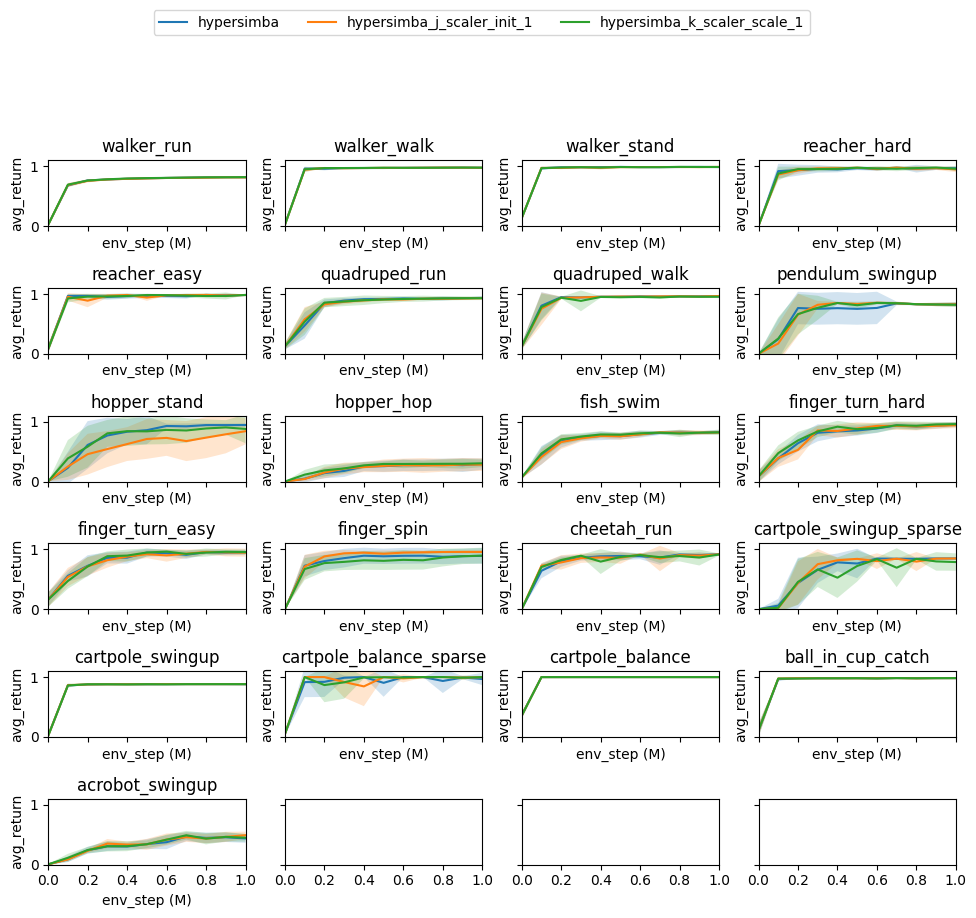

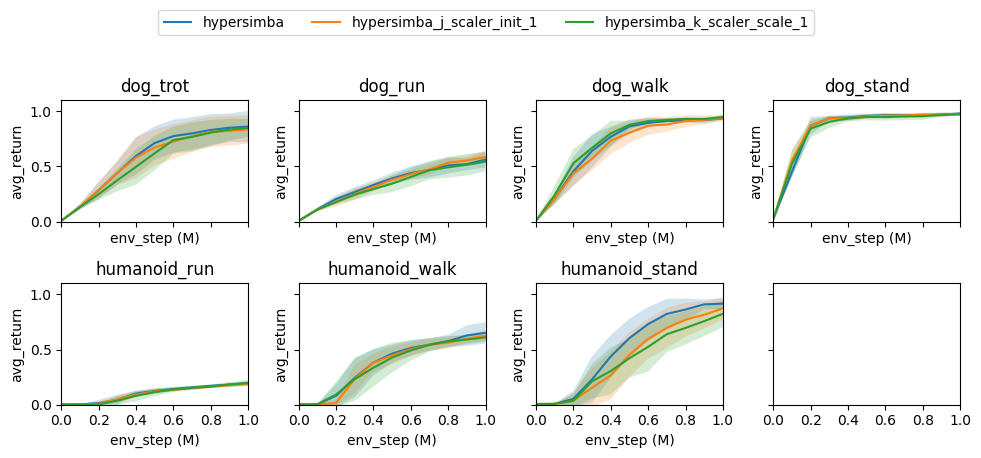

In [75]:
metric_matrix_dict = None

for env_type in ['DMC_EM', 'DMC_HARD']:
    if env_type == 'MUJOCO':
        env_list = MUJOCO_ALL
        env_step = 1e6
        metric_type = 'avg_return'
        plot_height=4 # 4
        y_lim_max=2.2

    if env_type == 'DMC_EM':
        env_list = DMC_EM
        env_step = 1e6
        metric_type = 'avg_return'
        plot_height=8 # 4
        y_lim_max=1.1

    elif env_type == 'DMC_HARD':
        env_list = DMC_HARD
        env_step = 1e6
        metric_type = 'avg_return'
        plot_height=4 # 2.5
        y_lim_max=1.1

    elif env_type == 'MYOSUITE':
        env_list = MYOSUITE_TASKS
        env_step = 1e6
        metric_type = 'avg_success'
        plot_height=6 # 2.5
        y_lim_max=1.1

    elif env_type == 'HB_LOCOMOTION_NOHAND':
        env_list = HB_LOCOMOTION_NOHAND
        env_step = 1e6
        metric_type = 'avg_return'
        plot_height=6 # 2.5
        y_lim_max=2.0

    _eval_df = eval_df[eval_df['env_name'].isin(env_list)]
    _eval_df = _eval_df[_eval_df['exp_name'].isin(cur_exp_names)]

    if env_type == 'MUJOCO':
        _eval_df = normalize_score_with_random_and_base_score(
            _eval_df, 
            MUJOCO_RANDOM_SCORE,
            MUJOCO_TD3_SCORE,
        )

    elif env_type in ['DMC_EM', 'DMC_HARD']:
        _eval_df.loc[:, 'value'] /= 1000.0

    elif env_type == 'HB_LOCOMOTION_NOHAND':
        _eval_df = normalize_score_with_random_and_base_score(
            _eval_df, 
            HB_RANDOM_SCORE,
            HB_SUCCESS_SCORE,
        )

    plot_metric_history_per_env(
        _eval_df,
        num_plots_per_row=4,
        metric=metric_type,
        x_lim_max=env_step,
        y_lim_max=y_lim_max,
        plot_width=10,
        plot_height=plot_height,
        y_label=metric_type,
    )

    _metric_matrix_dict = generate_metric_matrix_dict(
        _eval_df, 
        env_step=env_step,
        metric_type=metric_type,
    )

    if metric_matrix_dict is None:
        metric_matrix_dict = _metric_matrix_dict
    else:
        for key, arr2 in _metric_matrix_dict.items(): 
            if key in metric_matrix_dict: 
                arr1 = metric_matrix_dict[key] 
                min_cols = min(arr1.shape[1], arr2.shape[1]) 
                metric_matrix_dict[key] = np.concatenate( 
                    (arr1[:, :min_cols], arr2[:, :min_cols]), axis=0 
                ) 
            else: 
                metric_matrix_dict[key] = arr2.copy()

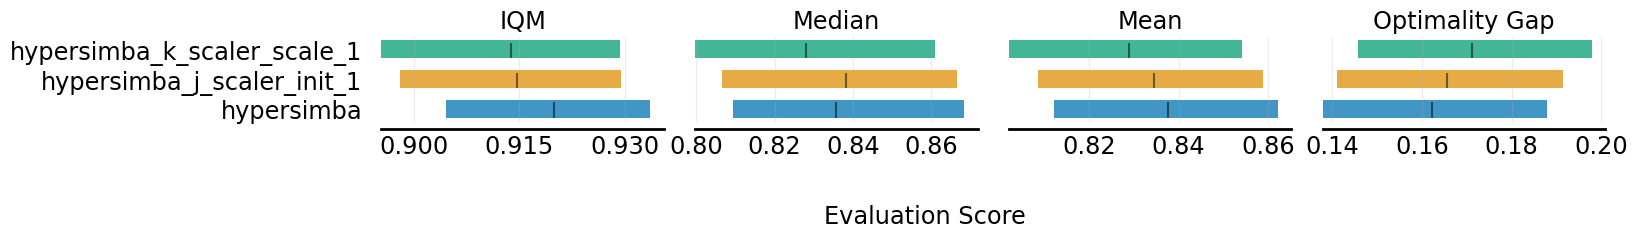

In [76]:
aggregate_scores, aggregate_score_cis = rly.get_interval_estimates(
    metric_matrix_dict, aggregate_func, reps=10000)

fig, axes = rly_plot_utils.plot_interval_estimates(
    aggregate_scores, aggregate_score_cis,
    metric_names=['IQM', 'Median', 'Mean', 'Optimality Gap'],
    algorithms=cur_exp_names,
    xlabel_y_coordinate=-0.8,
    xlabel='Evaluation Score',
)

In [77]:
for name in aggregate_scores.keys():
    score = aggregate_scores[name][2]
    lower = aggregate_score_cis[name][0][2]
    seeds = metric_matrix_dict[name].shape[1]
    print(seeds, name, score, score-lower)

10 hypersimba 0.8377085191143339 0.025564482679883982
10 hypersimba_j_scaler_init_1 0.8344952150206341 0.025941255757604198
10 hypersimba_k_scaler_scale_1 0.8288283994606458 0.02671937917865963


In [79]:
hypersimba_df = eval_df[eval_df['exp_name'] == 'relu_init_1/sqrt(d)_scale_1/sqrt(d)_ema005'].reset_index(drop=True)
design_j_scaler_init_1_df = eval_df[eval_df['exp_name'] == 'relu_init_1_scale_1/sqrt(d)_ema005'].reset_index(drop=True)
design_k_scaler_scale_1_df = eval_df[eval_df['exp_name'] == 'relu_init_1/sqrt(d)_scale_1_ema005'].reset_index(drop=True)

hypersimba_df['exp_name'] = 'hypersimba'
design_j_scaler_init_1_df['exp_name'] = 'hypersimba_j_scaler_init_1'
design_k_scaler_scale_1_df['exp_name'] = 'hypersimba_k_scaler_scale_1'

In [80]:
hypersimba_df.to_csv("../results/hypersimba/hypersimba.csv")
design_j_scaler_init_1_df.to_csv("../results/hypersimba/j_scaler_init_1.csv")
design_k_scaler_scale_1_df.to_csv("../results/hypersimba/k_scaler_scale_1.csv")